In [2]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install seaborn
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install sklearn
import pandas as pd

In [10]:
data = pd.read_csv('data_2021.csv')
data.head()

,Date,Y,Abandon,Rep,RepComms,Commend
0,23/05,0.400,0,0,0,16
1,20/05,0.333,0,0,0,6
2,14/05,0.667,0,2,0,16
3,07/05,0.600,0,1,0,22
4,01/05,0.400,0,1,0,7


In [28]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

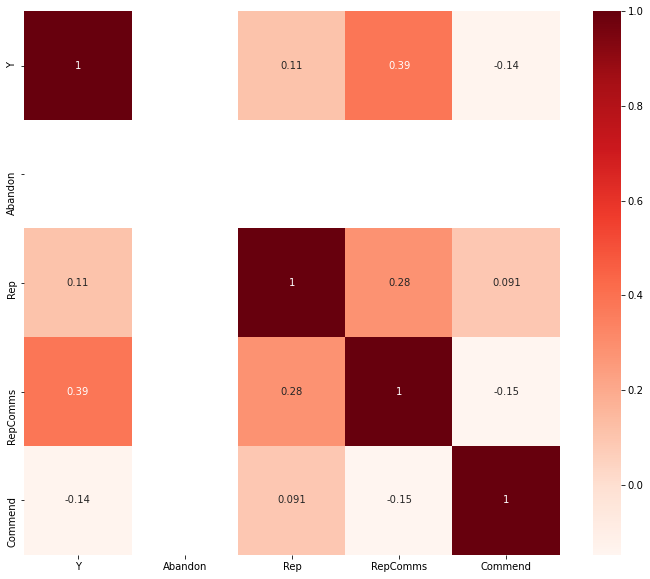

In [29]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

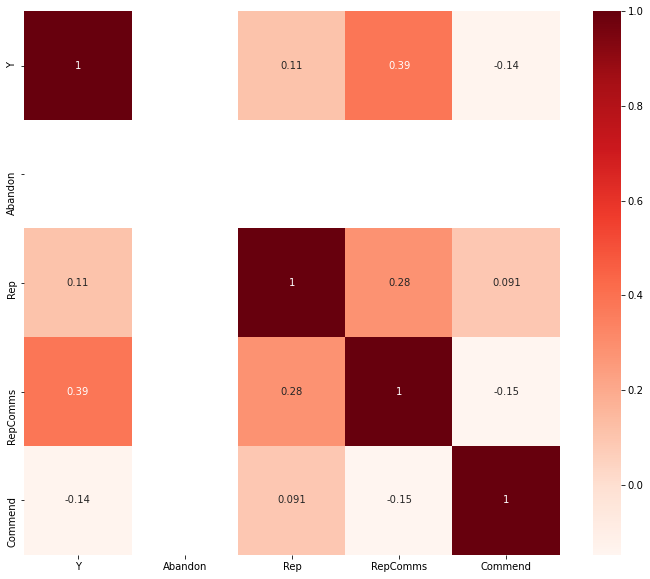

In [30]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [31]:
from statsmodels.formula.api import ols

In [32]:
model = ols("Y ~ Rep + RepComms + Commend", data=data)
results = model.fit()

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9789
Date:                Tue, 25 May 2021   Prob (F-statistic):              0.427
Time:                        16:25:01   Log-Likelihood:                 14.340
No. Observations:                  20   AIC:                            -20.68
Df Residuals:                      16   BIC:                            -16.70
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4749      0.073      6.480      0.000       0.320       0.630
Rep            0.0020      0.038      0.052      0.959      -0.078       0.082
RepComms       0.0639      0.042      1.513      0.150      -0.026       0.153
Commend       -0.0018      0.005     -0.359      0.724      -0.012       0.009
==============================================================================
Omnibus:                        1.212   Durbin-Watson:                   2.291
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                1.020
Skew:                           0.350   Prob(JB):                        0.601
Kurtosis:                       2.143   Cond. No.                         35.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
results.params

Intercept    0.480043
Rep         -0.007856
RepComms     0.066214
Commend     -0.001582
dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X = data.drop(['Date', 'Y', 'Abandon'], axis=1)
y = data.Y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [18]:
from sklearn.cross_decomposition import PLSRegression

In [19]:
clf = PLSRegression(n_components=1)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)

In [20]:
clf.score(X_test, y_test)

-0.003379500269452329

In [21]:
from sklearn.metrics import r2_score
Y_pred, y_test, r2_score(Y_pred, y_test)

(array([[0.55208541],
        [0.39818858],
        [0.35542458],
        [0.46090722],
        [0.4062003 ],
        [0.49108578],
        [0.48817121]]),
 0     0.400
 17    0.533
 15    0.267
 1     0.333
 8     0.400
 5     0.400
 11    0.667
 Name: Y, dtype: float64,
 -2.8850324449518774)